# Ford Go Bike 2018
## by Jaime Rado

## Preliminary Wrangling

> This data set includes information about individual rides made in a **bike-sharing** system covering the greater **San Francisco Bay** area in **2018**.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [7]:
# gather data
import os
import glob
#set working directory
os.chdir(r"C:\Users\XXXXXX")

# find all csv files in the folder
# use glob pattern matching -> extension = 'csv'
# save result in list -> all_filenames
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

# combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])
# export to csv
combined_csv.to_csv('2018FordGoBike.csv', index = False, encoding = 'utf-8')

In [2]:
# Load data
df = pd.read_csv('2018FordGoBike.csv')

print(df.shape)
print(df.dtypes)
df.head()

(1863721, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


## Assess

In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

In [5]:
df.duration_sec.describe()

count    1.863721e+06
mean     8.573026e+02
std      2.370379e+03
min      6.100000e+01
25%      3.500000e+02
50%      5.560000e+02
75%      8.720000e+02
max      8.636600e+04
Name: duration_sec, dtype: float64

In [6]:
# test if bikes are all picked and return within the same area
print('start station latitude range is: from ' + str(df.start_station_latitude.min()) + ' to ' + str(df.start_station_latitude.max()))
print('end station latitude range is: from ' + str(df.end_station_latitude.min()) + ' to ' + str(df.end_station_latitude.max()))
print('')
print('start station longitude range is: from ' + str(df.start_station_longitude.min()) + ' to ' + str(df.start_station_longitude.max()))
print('end station longitude range is: from ' + str(df.end_station_longitude.min()) + ' to ' + str(df.end_station_longitude.max()))

start station latitude range is: from 37.26331 to 45.51
end station latitude range is: from 37.26331 to 45.51

start station longitude range is: from -122.473658 to -73.57
end station longitude range is: from -122.473658 to -73.57


### Columns definitions

- `duration_sec`: trip duration in (seconds)
- `start_time`: ride start date and time
- `end_time`: ride end date and time


- `start_station_id`: start station id
- `start_station_name`: start station name and address
- `start_station_latitude`: start station latitude
- `start_station_longitude`: start station longitude


- `end_station_id`: end station id
- `end_station_name`: end station name and address
- `end_station_latitude`: end station latitude
- `end_station_longitude`: end station longitude


- `bike_id`: bike id
- `user_type`: subscriber=member or customer=casual
- `member_birth_year`: member birth year
- `member_gender`: member gender
- `bike_share_for_all_trip`: 

### Quality issues with the dataset

- `duration_sec` shows large unintuitive values

- `start_time`, `end_time` contain both date and time

- `start_time`, `end_time` are string types

- `start_station_id`, `end_station_id`, `member_birth_year` are float types

- `start_station_id`, `end_station_id` and its respective station names have 11771 null values

- `latitude`, `longitude` cover an area higher than San Francisco Bay Area. San Francisco Bay Area bounding box is -123,5337, 36,8931, -121,2082, 38,8643

- `bike_share_for_all_trip` is not even mentioned in 'https://www.fordgobike.com/system-data' as a part of data

## Clean

In [7]:
# make copy of dataset
df_clean = df.copy()
print(df_clean.shape)

(1863721, 16)


#### *Define*

> Isolate San Francisco Bay Area, as I only want to study this area

#### *Code*

In [8]:
df_clean = df_clean.query('36.8931 <= start_station_latitude <= 38.8643' and '-123.5337 <= start_station_longitude <= -121.2082')
print(df_clean.shape)

(1863710, 16)


#### *Test*

In [9]:
# test if bikes are all picked and return within the same San Francisco Bay area
# must return True
36.8931 <= (df_clean['start_station_latitude'].min() and df_clean['start_station_latitude'].max()) <= 38.8643, 
-123.5337 <= (df_clean['start_station_longitude'].min() and df_clean['start_station_longitude'].max()) <= -121.2082

True

#### *Define*

> Drop rows with station ids and names null. They might seem to be cancelled trips

#### *Code*

In [10]:
df_clean = df_clean[pd.notnull(df['start_station_id'])]
print(df_clean.shape)

C:\Users\Puput\Anaconda3\envs\py3.6\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(1851950, 16)


#### *Test*

In [11]:
df_clean.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id                0
start_station_name              0
start_station_latitude          0
start_station_longitude         0
end_station_id                  0
end_station_name                0
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110394
member_gender              110043
bike_share_for_all_trip         0
dtype: int64

#### *Define*

> Convert `start_time`, `end_time` to **datetime** types

> Convert `start_station_id`, `end_station_id`, `member_birth_year` to **integer** types

#### *Code*

In [12]:
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

df_clean['start_station_id'] = df_clean['start_station_id'].astype(int)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(int)

In [13]:
df_clean['member_birth_year'].fillna(0, inplace = True)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

#### *Test*

In [14]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int32
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int32
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [15]:
# reset index
df_clean.reset_index(drop = True, inplace = True)
df_clean.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1851945,473,2018-12-01 00:11:54.811,2018-12-01 00:19:48.547,345,Hubbell St at 16th St,37.766474,-122.398295,81,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,1982,Female,No
1851946,841,2018-12-01 00:02:48.726,2018-12-01 00:16:49.766,10,Washington St at Kearny St,37.795393,-122.404770,58,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,1999,Female,No
1851947,260,2018-12-01 00:05:27.615,2018-12-01 00:09:47.956,245,Downtown Berkeley BART,37.870139,-122.268422,255,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,1991,Male,No
1851948,292,2018-12-01 00:03:06.549,2018-12-01 00:07:59.080,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,126,Esprit Park,37.761634,-122.390648,545,Subscriber,1963,Male,No
1851949,150,2018-12-01 00:03:05.742,2018-12-01 00:05:36.026,107,17th St at Dolores St,37.763015,-122.426497,119,18th St at Noe St,37.761047,-122.432642,4319,Subscriber,0,NaN,No


#### *Define*

> Create month, week type and day columns **(categorical data)** so that it is simpler to plot time

#### *Code*

In [16]:
df_clean['start_time_day'] = df_clean.start_time.dt.strftime('%A')

df_clean['start_time_month'] = df_clean.start_time.dt.strftime('%B')

df_clean['start_time_type'] = df_clean.start_time.dt.weekday.apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

df_clean.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_day,start_time_month,start_time_type
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.76142,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No,Wednesday,January,Weekday


#### *Test*

In [17]:
list(df_clean.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip',
 'start_time_day',
 'start_time_month',
 'start_time_type']

In [18]:
df_clean = df_clean[['duration_sec',
                     'start_time',
                     'end_time',
                     'start_time_month',
                     'start_time_type',
                     'start_time_day',
                     'start_station_id',
                     'start_station_name',
                     'start_station_latitude',
                     'start_station_longitude',
                     'end_station_id',
                     'end_station_name',
                     'end_station_latitude',
                     'end_station_longitude',
                     'bike_id',
                     'user_type',
                     'member_birth_year',
                     'member_gender',
                     'bike_share_for_all_trip']]

df_clean.head(1)

,duration_sec,start_time,end_time,start_time_month,start_time_type,start_time_day,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,January,Weekday,Wednesday,120,Mission Dolores Park,37.76142,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No


#### *Define*

> Convert `start_time_month`, `start_time_type`, `start_time_day` to categorical type

#### *Code*

In [19]:
df_clean['start_time_month'] = df_clean['start_time_month'].astype('category')
df_clean['start_time_type'] = df_clean['start_time_type'].astype('category')
df_clean['start_time_day'] = df_clean['start_time_day'].astype('category')

# also for user_type and member_gender would be convenient
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')

#### *Test*

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851950 entries, 0 to 1851949
Data columns (total 19 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_time_month           category
start_time_type            category
start_time_day             category
start_station_id           int32
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             int32
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  category
member_birth_year          int32
member_gender              category
bike_share_for_all_trip    object
dtypes: category(5), datetime64[ns](2), float64(4), int32(3), int64(2), object(3)
memory usage: 185.4+ MB


#### *Define*

> Convert `duration_sec` to `duration_min` as minuts seem to be a more intuitive mesure

#### *Code*

In [21]:
def minuts(y):
    x = y / 60
    return x

df_clean['duration_sec'] = df_clean['duration_sec'].apply(minuts)
print(df_clean.dtypes)
df_clean.duration_sec.head()

duration_sec                      float64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_time_month                 category
start_time_type                  category
start_time_day                   category
start_station_id                    int32
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int32
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                   int32
member_gender                    category
bike_share_for_all_trip            object
dtype: object


0    1254.733333
1    1423.700000
2    1192.933333
3    1017.933333
4     666.100000
Name: duration_sec, dtype: float64

#### *Test*

In [22]:
df_clean = df_clean.rename(index = str, columns = {'duration_sec': 'duration_min'})
df_clean.head(1)

,duration_min,start_time,end_time,start_time_month,start_time_type,start_time_day,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,1254.733333,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,January,Weekday,Wednesday,120,Mission Dolores Park,37.76142,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No


### What is the structure of your dataset?

> There are **1.851.950 bike rides** in 2018 with start and end date, time and location for every ride. We also have the bike id, and some information about the user (type, birth year and gender).
**There are 8 categorical columns, 9 numeric columns, and 2 datetime.**

### What is/are the main feature(s) of interest in your dataset?

> When are most trips taken in terms of time of day, day of the week, or month of the year?

> How long does the average trip take?

> Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start_time, start_time_month, start_time_type, start_time_day

> duration_min

> user_type compared to duration_min. Also to start_time_month, start_time_type and start_type_day

## Univariate Exploration

____________

In [23]:
# convert start_time_month and start_time_day to ordered categorical variables
# look at months
df_clean.start_time_month.unique()

[January, February, March, April, May, ..., August, September, October, November, December]
Length: 12
Categories (12, object): [January, February, March, April, ..., September, October, November, December]

In [24]:
# look at days of week
df_clean.start_time_day.unique()

[Wednesday, Tuesday, Monday, Sunday, Saturday, Friday, Thursday]
Categories (7, object): [Wednesday, Tuesday, Monday, Sunday, Saturday, Friday, Thursday]

In [25]:
# convert start_time_month and start_time_day to ordered categorical variables
ordinal_var_dict = {'start_time_month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
                    'start_time_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)

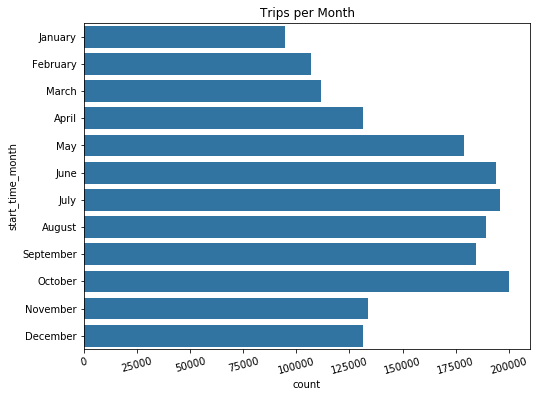

In [26]:
# bar chart for categorical variables
# trips per month
base_color = sb.color_palette()[0]

plt.figure(figsize = [8,6])
sb.countplot(data = df_clean, y = 'start_time_month', color = base_color)
plt.xticks(rotation = 15)
plt.title('Trips per Month');

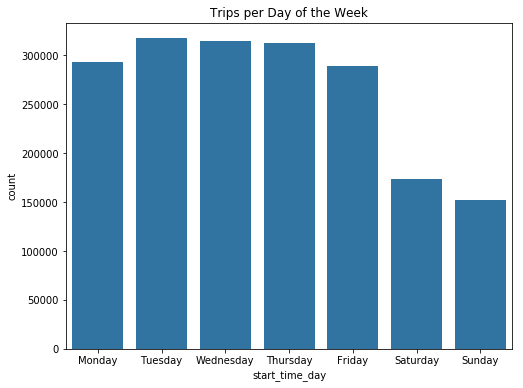

In [27]:
# trips per day of the week
plt.figure(figsize = [8,6])
sb.countplot(data = df_clean, x = 'start_time_day', color = base_color)
plt.title('Trips per Day of the Week');

In [28]:
df_clean.start_time_type.unique()

[Weekday, Weekend]
Categories (2, object): [Weekday, Weekend]

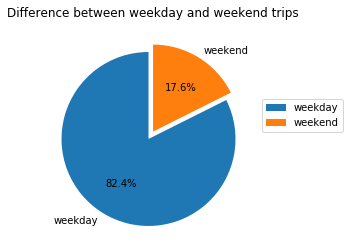

In [29]:
# trips per week type
weekday = len(df_clean[df_clean['start_time_type'] == 'Weekday'])
weekend = len(df_clean[df_clean['start_time_type'] != 'Weekday'])

x_labels = ['weekday', 'weekend']
y = [weekday, weekend]
explode = (0.1, 0)
plt.pie(y, labels = x_labels, explode = explode, startangle=90, autopct='%1.1f%%')
plt.legend (labels = x_labels, loc = (1, 0.5))
plt.title('Difference between weekday and weekend trips');

> After these first plots, it looks pretty clear that Ford Go Bike is **seasonal**. It is more demanded from **May to October**.
It is also clear that it is way more used on **weekdays**. This can lead to think that this service is seen (in consumer´s mind) more as a transportation service rather than a leisure service, as on weekdays they are working.

> Now, I would like to plot the **number of trips classified by times of day** and the **average trip by times of day and by days** (to dive deep into the transportation idea).

In [30]:
# see the scope of duration_min to select bins size for plot
df_clean.duration_min.min(), df_clean.duration_min.max()

(1.0166666666666666, 1439.4333333333334)

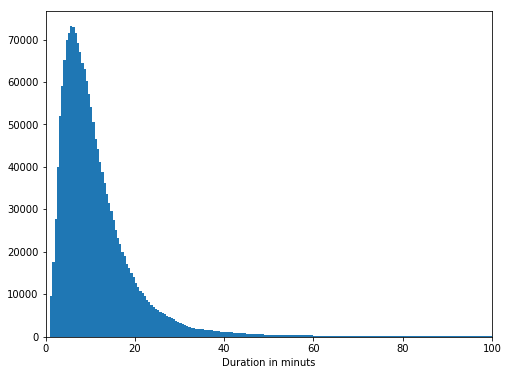

In [31]:
# plot duration of every trip
binsize = 0.5
bins = np.arange(0, df_clean['duration_min'].max() + binsize, binsize)

plt.figure(figsize = [8,6])
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.xlim((0,100))
plt.xlabel('Duration in minuts')
plt.show;

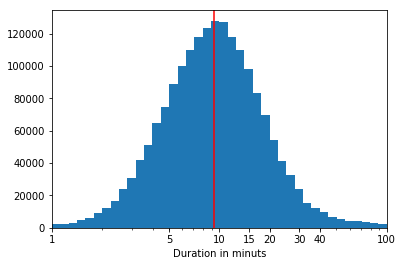

In [32]:
# log scale to get more insights about the average duration in minuts
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max()) + log_binsize, log_binsize)

plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1, 5, 10, 15, 20, 30, 40, 100], [1, 5, 10, 15, 20, 30, 40, 100])
plt.xlim((1, 100))
plt.xlabel('Duration in minuts')
plt.axvline(x = df_clean.duration_min.median(), color = 'red') # where the median value lies
plt.show();

In [33]:
df_clean.duration_min.mean()

14.216656164223291

> We see a right-skewed distribution of duration of trips, being for instance the **average time duration around 10 minuts** (if we take into account that there are many outliers in the data, the mean would fall from 14.21 minuts down to 10 minuts as we see in the plot above.

> We also can derive that **the usual trip is 10 minuts or less**, as this range of time is as numerous as the interval from 10 to maximum.

In [34]:
# let's take a look at the hours of day
df_clean['start_time_hour'] = df_clean.start_time.dt.strftime('%H')

df_clean.start_time_hour.unique()

array(['22', '16', '14', '19', '23', '20', '21', '18', '17', '13', '06',
       '15', '10', '12', '11', '08', '07', '09', '05', '04', '03', '02',
       '01', '00'], dtype=object)

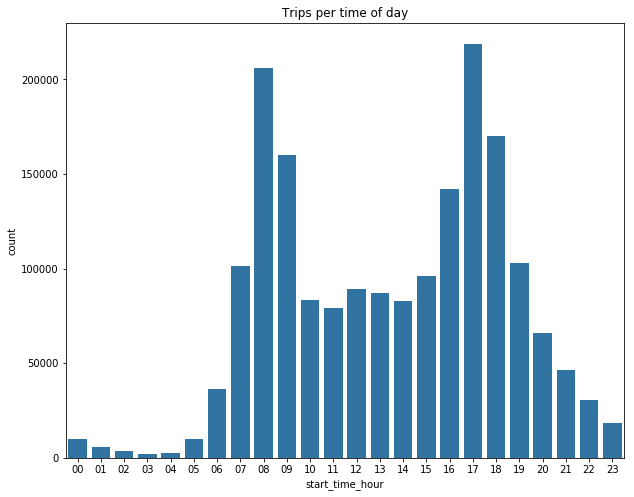

In [35]:
# I believe the best would have been a function to loop the hour_classes, I tried but couldn't manage to
hour_classes = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
hours = pd.api.types.CategoricalDtype(ordered = True, categories = hour_classes)
df_clean['start_time_hour'] = df_clean['start_time_hour'].astype(hours)

plt.figure(figsize = [10,8])
sb.countplot(data = df_clean, x = 'start_time_hour', color = base_color)
plt.title('Trips per time of day');

> It is also clear that the **most frequent times** follow a **bimodal distribution**, and reach the peak before and after work **(8-10h), (17-19h)**. So it matches the idea of bike trips for transportation reasons.

> If the idea was to offer a new way of **transportation for comuting**, and free the streets of cars (which looks pretty straightforward when talking about bikes), the plots show a **success** in this sence.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The plots show that bikes are way more used from **May to October**, on **weekdays** and during commuting hours **(8-10h), (17-19h)**.  

> The **average time is around 10 minuts**, but it is **very common that the ride takes less than 10 minuts**. There are outliers which are trips that last 60 minuts or more. 

> It seems clear that people use this service to **commute to and from work** and the **seasonality** is probably due to weather reasons.

> I needed to use a log scale to plot the duration in minuts, as otherwise I had so much noisy data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The trip duration does have a very unusual **right-skewed distribution**, which might be due to system errors to set end_time for trips, or due to people who forget they started a trip with the bike. This is explained with the axline for the median, that shows that the most usual trip is less than 10 minuts. However, I'm not going to delete those outliers because I don't know the reason, and with log scale I could find out the truth from the data.

> I value counted and indexed times of day so that I could plot their counts. I also created columns for months, week types, days to get a full insight of the bikes usage in terms of time. 

## Bivariate Exploration

_______________

In [36]:
print(df_clean.dtypes)

duration_min                      float64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_time_month                 category
start_time_type                  category
start_time_day                   category
start_station_id                    int32
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int32
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                   int32
member_gender                    category
bike_share_for_all_trip            object
start_time_hour                  category
dtype: object


In [37]:
numeric_vars = ['duration_min', 'start_station_id', 'end_station_id', 'bike_id', 'member_birth_year']

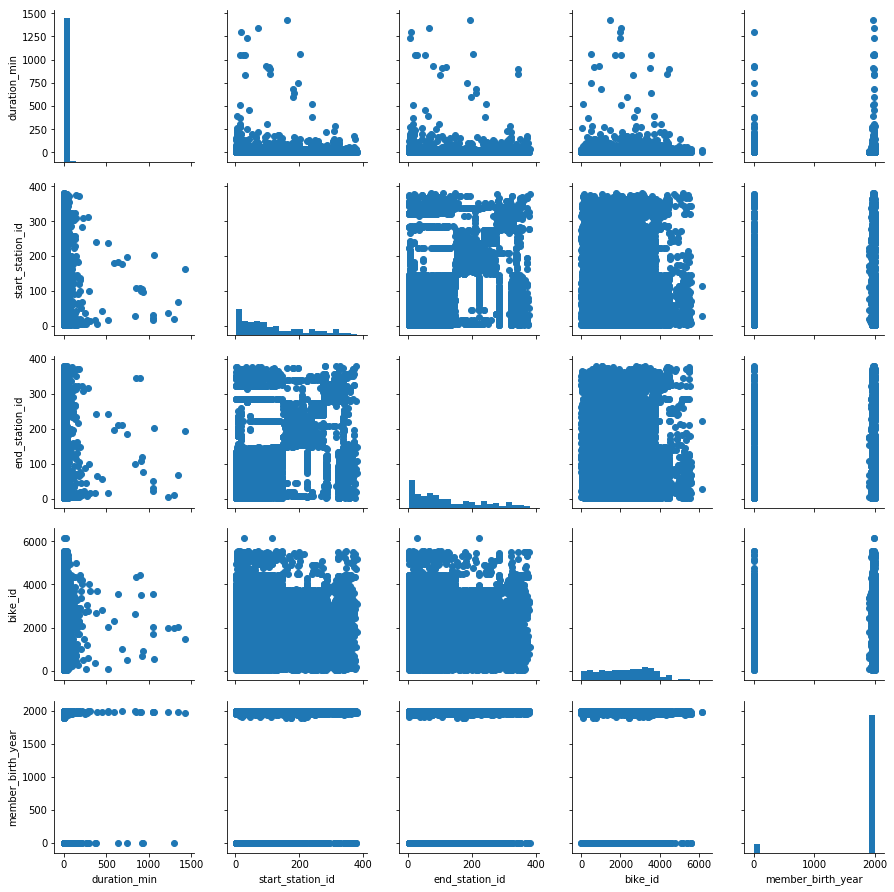

In [38]:
# plot possible relationships between numeric variables
df_clean_sample = df_clean.sample(10000)

g = sb.PairGrid(data = df_clean_sample, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

> Apparently, there are no direct relationships between the numeric variables of this dataset.

> We can observe though that there are several **start stations, end stations and bikes that are being used more often than  average**. 

> Now, I'll take a look at the average trip per time of day, day of the week and week type

In [39]:
# allocate properly the start_time_hour I created before to see the table again
df_clean = df_clean[['duration_min',
                     'start_time',
                     'end_time',
                     'start_time_month',
                     'start_time_type',
                     'start_time_day',
                     'start_time_hour',
                     'start_station_id',
                     'start_station_name',
                     'start_station_latitude',
                     'start_station_longitude',
                     'end_station_id',
                     'end_station_name',
                     'end_station_latitude',
                     'end_station_longitude',
                     'bike_id',
                     'user_type',
                     'member_birth_year',
                     'member_gender',
                     'bike_share_for_all_trip']]

df_clean.head()

,duration_min,start_time,end_time,start_time_month,start_time_type,start_time_day,start_time_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,1254.733333,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,January,Weekday,Wednesday,22,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No
1,1423.700000,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,January,Weekday,Wednesday,16,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,0,NaN,No
2,1192.933333,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,January,Weekday,Wednesday,14,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,Male,No
3,1017.933333,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,January,Weekday,Wednesday,14,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,0,NaN,No
4,666.100000,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,January,Weekday,Wednesday,19,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,Male,No


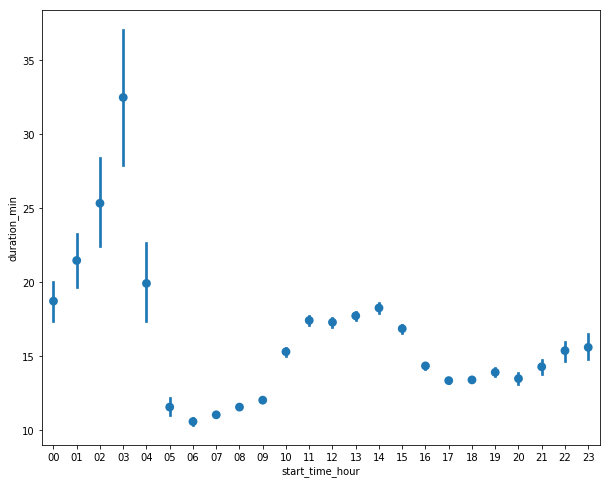

In [40]:
# plot average trip time per time of day
plt.figure(figsize=[10,8])

sb.pointplot(data = df_clean, x = 'start_time_hour', y = 'duration_min', linestyles = '');

> This plot is counterintuitive. I acknowledged before the average "normal" trip was around 10 minuts, and it is more often the <10min ride than >10min. I believe the outliers are here messing my conclussions.

> I will then just plot the average trip between 0 and 40 minuts as it seems the "normal" confidence interval of this dataset.

In [41]:
# confirm the above statement I
df_clean.groupby('start_time_hour').mean().duration_min

start_time_hour
00    18.722140
01    21.466182
02    25.327942
03    32.467775
04    19.919089
05    11.569386
06    10.589814
07    11.046799
08    11.568018
09    12.034994
10    15.305537
11    17.418836
12    17.293063
13    17.729271
14    18.261216
15    16.861028
16    14.349391
17    13.356349
18    13.404440
19    13.914491
20    13.490572
21    14.289734
22    15.379108
23    15.601135
Name: duration_min, dtype: float64

In [42]:
# confirm the above statement II
df_clean.query("start_time_hour == '17'").duration_min.value_counts()

5.833333       333
6.983333       327
6.050000       326
6.733333       324
6.933333       321
6.583333       319
5.750000       314
6.950000       313
8.116667       312
7.616667       310
6.600000       310
5.083333       309
5.850000       308
7.400000       306
7.716667       306
7.316667       306
6.200000       305
6.283333       305
6.450000       305
7.666667       305
5.800000       304
7.850000       303
7.750000       303
6.366667       303
8.333333       302
5.133333       302
7.500000       301
6.466667       301
7.466667       300
5.100000       300
              ... 
105.216667       1
1104.050000      1
69.050000        1
58.866667        1
92.516667        1
92.983333        1
69.900000        1
45.800000        1
891.666667       1
976.550000       1
1268.166667      1
169.866667       1
184.283333       1
118.883333       1
252.400000       1
252.600000       1
105.283333       1
73.716667        1
92.666667        1
40.866667        1
1171.283333      1
132.116667  

In [43]:
# create a sub dataset with duration_min under 40 minuts
df_clean_sub = df_clean.query('duration_min <= 40')
df_clean_sub.groupby('start_time_hour').mean().duration_min

start_time_hour
00     9.919703
01    10.333902
02    10.680014
03    10.514344
04     9.363942
05     8.826963
06     9.016852
07     9.993082
08    10.518089
09    10.124070
10    10.618171
11    11.217841
12    11.237572
13    11.357176
14    11.778051
15    11.643565
16    11.087713
17    10.956270
18    10.740718
19    10.484407
20    10.124842
21    10.116697
22    10.166115
23     9.955901
Name: duration_min, dtype: float64

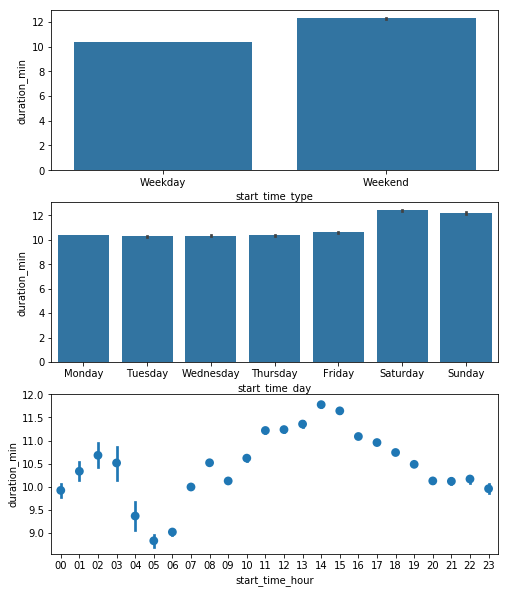

In [44]:
# plot average trip duration per week type, day of week and time of day within duration_min 0-40 minuts
# It takes around 4 minuts to render
fig, ax = plt.subplots(nrows = 3, figsize = [8,10])

sb.barplot(data = df_clean_sub, x = 'start_time_type', y = 'duration_min', color = base_color, ax = ax[0])
sb.barplot(data = df_clean_sub, x = 'start_time_day', y = 'duration_min', color = base_color, ax = ax[1])
sb.pointplot(data = df_clean_sub, x = 'start_time_hour', y = 'duration_min', linestyles = '', ax = ax[2])

plt.show();

> It is clear that the **average trip is longer on weekends (almost 2 points more than weekdays)**, probably because people aren't rushing to work, they ride more relaxed

> The average trip is the longest at 14-15h. If we broaden it, **within the 11-18h interval the average trip is the longest**. 

> The time interval between 17-19h is rush hour for the bike-sharing service. It is the time interval when more bikes are required and the average trip takes quite long. The other time interval is from 8-10h, and this probably has a lower trip time average because people are less tired, or they don't want to get to work late.

In [45]:
# take a look at the bike_id, start_station_id and end_station_id outliers
make_means = df_clean.groupby('bike_id').mean().duration_min
make_means.sort_values(ascending = False).head(10)

bike_id
4612    250.550000
5508     79.673529
4840     67.193333
3713     52.366667
5339     51.802083
4575     48.180952
4553     47.735965
5012     39.761966
4910     39.425000
5063     37.385920
Name: duration_min, dtype: float64

In [46]:
# start_station_id
make_means_start_station = df_clean.groupby('start_station_id').mean().duration_min
make_means_start_station.sort_values(ascending = False).head(10)

start_station_id
374    54.158667
367    42.805556
229    36.649908
377    34.123618
155    30.521344
359    29.456593
226    28.692789
70     28.682527
371    28.354261
224    28.337168
Name: duration_min, dtype: float64

In [47]:
# end_station_id

make_means_end_station = df_clean.groupby('end_station_id').mean().duration_min
make_means_end_station.sort_values(ascending = False).head(10)

end_station_id
344    117.327302
374     65.342222
29      40.430134
377     39.661955
371     39.190923
70      37.797636
375     36.295036
229     34.881519
224     34.415023
367     33.024691
Name: duration_min, dtype: float64

> There are two outliers regarding this matter. One is the bike_id (4612), and the other one is the end_station_id (344). The figures of their duration_min average are far from the next figure. We can think this bike, and this end_station may have system errors and might not end the trip at a proper time, as it looks quite unreasonable to have one single bike that far from the others.

In [48]:
df_clean[df_clean['end_station_id'] == 344]

,duration_min,start_time,end_time,start_time_month,start_time_type,start_time_day,start_time_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
331297,28.550000,2018-04-27 07:51:59.463,2018-04-27 08:20:32.762,April,Weekday,Friday,07,47,4th St at Harrison St,37.780955,-122.399749,344,16th St Depot,37.766349,-122.396289,3258,Subscriber,1975,Male,No
331814,7.833333,2018-04-27 05:49:26.882,2018-04-27 05:57:17.642,April,Weekday,Friday,05,97,14th St at Mission St,37.768265,-122.420110,344,16th St Depot,37.766349,-122.396289,3955,Subscriber,1989,Male,No
333904,18.783333,2018-04-26 17:17:26.566,2018-04-26 17:36:14.456,April,Weekday,Thursday,17,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,344,16th St Depot,37.766349,-122.396289,3785,Subscriber,1985,Male,No
336531,10.533333,2018-04-26 09:02:42.920,2018-04-26 09:13:15.215,April,Weekday,Thursday,09,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,344,16th St Depot,37.766349,-122.396289,3937,Subscriber,1981,Female,No
337642,20.983333,2018-04-26 07:00:23.325,2018-04-26 07:21:22.335,April,Weekday,Thursday,07,146,30th St at San Jose Ave,37.742314,-122.423181,344,16th St Depot,37.766349,-122.396289,3791,Subscriber,1965,Male,No
341364,7.283333,2018-04-25 13:38:31.619,2018-04-25 13:45:48.716,April,Weekday,Wednesday,13,80,Townsend St at 5th St,37.775306,-122.397380,344,16th St Depot,37.766349,-122.396289,3916,Subscriber,1982,Male,No
342347,3.916667,2018-04-25 09:55:49.198,2018-04-25 09:59:44.420,April,Weekday,Wednesday,09,115,Jackson Playground,37.765026,-122.398773,344,16th St Depot,37.766349,-122.396289,3892,Subscriber,1990,Male,No
342349,3.966667,2018-04-25 09:55:38.796,2018-04-25 09:59:37.725,April,Weekday,Wednesday,09,115,Jackson Playground,37.765026,-122.398773,344,16th St Depot,37.766349,-122.396289,3926,Subscriber,1982,Male,No
342998,13.633333,2018-04-25 08:46:10.165,2018-04-25 08:59:49.152,April,Weekday,Wednesday,08,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,344,16th St Depot,37.766349,-122.396289,3892,Subscriber,1981,Female,No
344176,9.183333,2018-04-25 05:41:20.694,2018-04-25 05:50:31.943,April,Weekday,Wednesday,05,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,344,16th St Depot,37.766349,-122.396289,2023,Subscriber,1986,Male,No


In [49]:
df_clean[df_clean['bike_id'] == 4612]

,duration_min,start_time,end_time,start_time_month,start_time_type,start_time_day,start_time_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1746561,250.55,2018-12-21 19:49:55.607,2018-12-22 00:00:28.907,December,Weekday,Friday,19,229,Foothill Blvd at 42nd Ave,37.775745,-122.213037,229,Foothill Blvd at 42nd Ave,37.775745,-122.213037,4612,Subscriber,1996,Male,No


> I won't delete these outliers, because there are no clear reasons for end_station_id, and bike_id has only been used once,  that's why its average is so high.

> Now, I'll try to answer the last question. How the type of user affects the bikes usage?

In [50]:
# first, let's take a look at differences
df_clean.user_type.value_counts()

Subscriber    1574991
Customer       276959
Name: user_type, dtype: int64

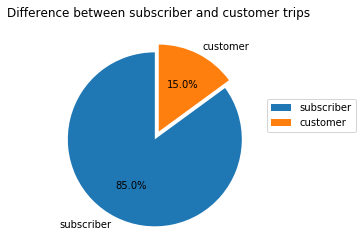

In [51]:
# plot user_type relative numbers
subscriber = len(df_clean[df_clean['user_type'] == 'Subscriber'])
customer = len(df_clean[df_clean['user_type'] != 'Subscriber'])

x_labels = ['subscriber', 'customer']
y = [subscriber, customer]
explode = (0.1, 0)
plt.pie(y, labels = x_labels, explode = explode, startangle=90, autopct='%1.1f%%')
plt.legend (labels = x_labels, loc = (1, 0.5))
plt.title('Difference between subscriber and customer trips');

> Now, let's see how they behave. Are there differences in duration_time and day of the week?

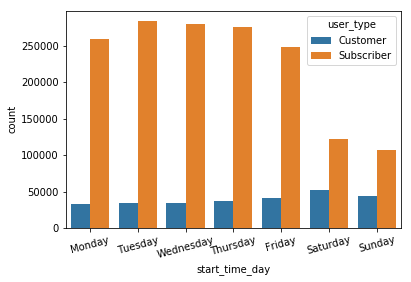

In [52]:
# user_type number of trips per day of week
sb.countplot(data = df_clean, x = 'start_time_day', hue = 'user_type')
plt.xticks(rotation = 15);

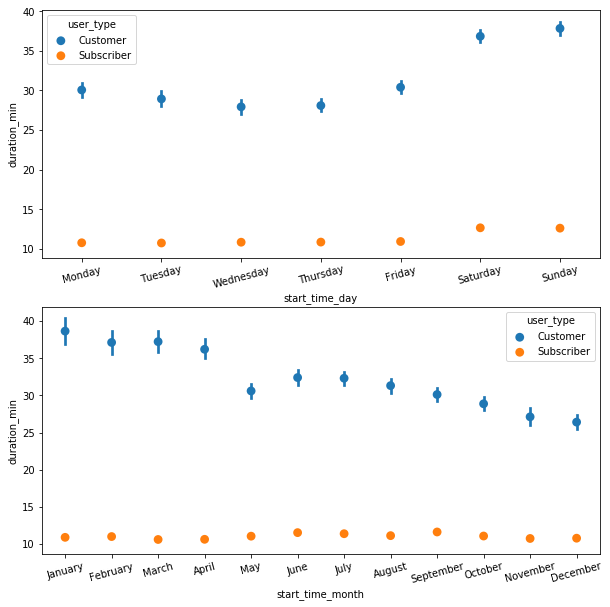

In [53]:
# user_type average duration per day of week and month
# it takes around 2.30 minuts to render
plt.figure(figsize=[10,10])

plt.subplot(2, 1, 1)
sb.pointplot(data = df_clean, x = 'start_time_day', y = 'duration_min', hue = 'user_type',
            linestyles = "")
plt.xticks(rotation = 15);

plt.subplot(2, 1, 2)
sb.pointplot(data = df_clean, x = 'start_time_month', y = 'duration_min', hue = 'user_type',
            linestyles = "")
plt.xticks(rotation = 15);

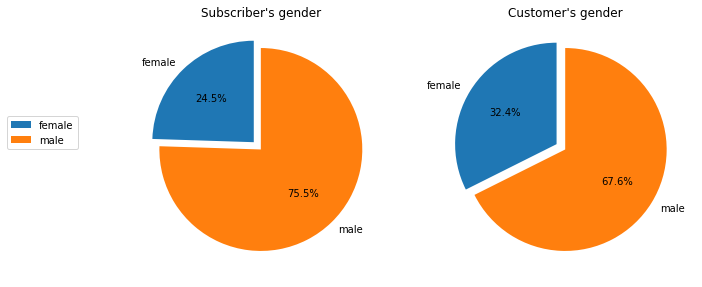

In [54]:
# let's see the gender differences between subscribers and customers
# gender among subscribers
plt.figure(figsize=[10,15])

plt.subplot(1, 2, 1)
female_sub = len(df_clean[(df_clean['user_type'] == 'Subscriber') & (df_clean['member_gender'] == 'Female')])
male_sub = len(df_clean[(df_clean['user_type'] == 'Subscriber') & (df_clean['member_gender'] == 'Male')])

x_labels = ['female', 'male']
y = [female_sub, male_sub]
explode = (0.1, 0)
plt.pie(y, labels = x_labels, explode = explode, startangle=90, autopct='%1.1f%%')
plt.legend (labels = x_labels, loc = (-0.5, 0.5))
plt.title('Subscriber\'s gender');

#gender among consumers
plt.subplot(1, 2, 2)
female_con = len(df_clean[(df_clean['user_type'] == 'Customer') & (df_clean['member_gender'] == 'Female')])
male_con = len(df_clean[(df_clean['user_type'] == 'Customer') & (df_clean['member_gender'] == 'Male')])

x_labels = ['female', 'male']
y = [female_con, male_con]
explode = (0.1, 0)
plt.pie(y, labels = x_labels, explode = explode, startangle=90, autopct='%1.1f%%')
plt.title('Customer\'s gender');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 85% of users are subscribers. These **subscribers take less time per trip than customers**, surely because of the work vs. leisure. On the weekends both user types take more time, which matches the previous idea.

> **Customers use this service the most on weekends and subscribers on weekdays**.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Customers take on average **3 times more** time per trip than subscribers.

> 75% of subscribers and 68% of Customers are **Male**.

## Multivariate Exploration

_________________

In [55]:
# convert member_gender column to string as I couldn't run the next plot without the 'Other' category. 
# just wanted Female and Male and needed to delete any other value and couldn't do it with a categorical value
df_clean['member_gender'] = df_clean['member_gender'].astype(str)
print(df_clean.member_gender.dtypes)

object


In [56]:
df_clean_gender = df_clean.loc[df_clean['member_gender'].isin(['Female', 'Male'])]

In [57]:
df_clean_gender.member_gender.value_counts()

Male      1279545
Female     435361
Name: member_gender, dtype: int64

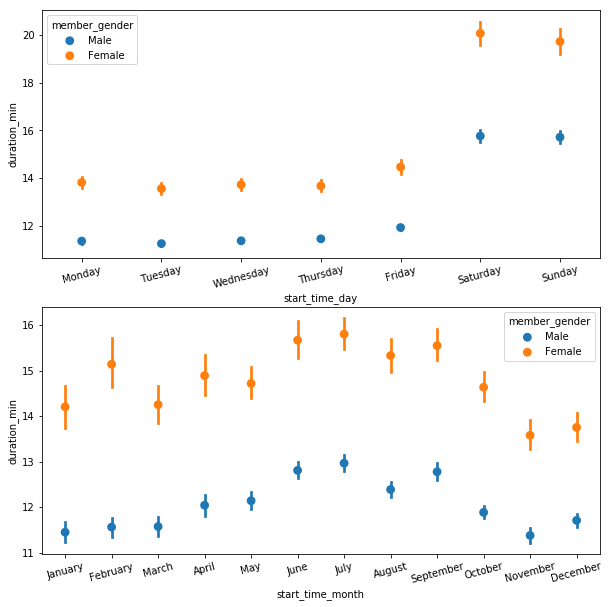

In [58]:
# average duration per gender and day of week or month
plt.figure(figsize=[10,10])

plt.subplot(2, 1, 1)
sb.pointplot(data = df_clean_gender, x = 'start_time_day', y = 'duration_min', hue = 'member_gender', linestyles = "")
plt.xticks(rotation = 15);

plt.subplot(2, 1, 2)
sb.pointplot(data = df_clean_gender, x = 'start_time_month', y = 'duration_min', hue = 'member_gender', linestyles = "")
plt.xticks(rotation = 15);

In [59]:
# now, I'll take a look at member_birth_year column
df_clean.head()

,duration_min,start_time,end_time,start_time_month,start_time_type,start_time_day,start_time_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,1254.733333,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,January,Weekday,Wednesday,22,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No
1,1423.700000,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,January,Weekday,Wednesday,16,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,0,nan,No
2,1192.933333,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,January,Weekday,Wednesday,14,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,Male,No
3,1017.933333,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,January,Weekday,Wednesday,14,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,0,nan,No
4,666.100000,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,January,Weekday,Wednesday,19,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,Male,No


In [60]:
# drop member_birth_year empty values
df_clean_birth_year = df_clean[df_clean.member_birth_year != 0]
df_clean_birth_year[df_clean_birth_year['member_birth_year'] == 0]

,duration_min,start_time,end_time,start_time_month,start_time_type,start_time_day,start_time_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [61]:
# get the member's age out of the birth year
def age(year):
    x = 2019 - year
    return x

In [62]:
df_clean_birth_year['member_birth_year'] = df_clean_birth_year['member_birth_year'].apply(age)
df_clean_birth_year.rename(columns = {'member_birth_year': 'member_age'}, inplace = True)
df_clean_birth_year.head()

C:\Users\Puput\Anaconda3\envs\py3.6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Puput\Anaconda3\envs\py3.6\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,duration_min,start_time,end_time,start_time_month,start_time_type,start_time_day,start_time_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_age,member_gender,bike_share_for_all_trip
0,1254.733333,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,January,Weekday,Wednesday,22,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,33,Male,No
2,1192.933333,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,January,Weekday,Wednesday,14,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,23,Male,No
4,666.100000,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,January,Weekday,Wednesday,19,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,28,Male,No
6,7.550000,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,January,Weekday,Wednesday,23,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,31,Male,No
7,3.000000,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,January,Weekday,Wednesday,23,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,39,Male,No


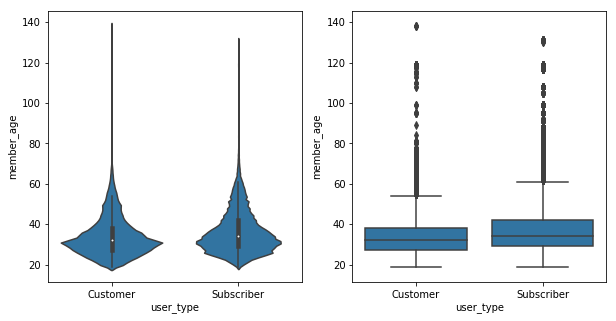

In [63]:
# plot age differences between type of users
plt.figure(figsize = [10, 5])

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_clean_birth_year, x = 'user_type', y = 'member_age', color = base_color)

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df_clean_birth_year, x = 'user_type', y = 'member_age', color = base_color)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

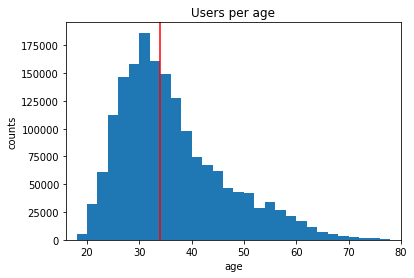

In [64]:
# how old are the main users of this service?
plt.hist(data = df_clean_birth_year, x = 'member_age', bins = np.arange(16, df_clean_birth_year['member_age'].max()+2, 2))
plt.xlim((16,80))
plt.xlabel('age')
plt.ylabel('counts')
plt.title('Users per age')
plt.axvline(x = df_clean_birth_year.member_age.median(), color = 'red');

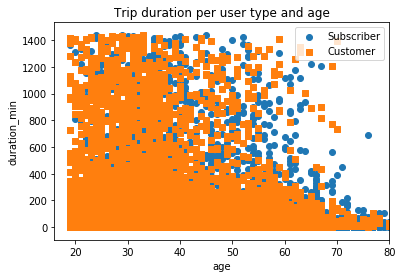

In [65]:
# see if there is anything to say about the trip duration per type of user and their age
# it takes around 4 minuts to render
cat_markers = [['Subscriber', 'o'],
               ['Customer', 's']]

for cat, marker in cat_markers:
    df_cat = df_clean_birth_year[df_clean_birth_year['user_type'] == cat]
    plt.scatter(data = df_cat, x = 'member_age', y = 'duration_min', marker = marker)
plt.xlabel('age')
plt.ylabel('duration_min')
plt.title('Trip duration per user type and age')
plt.xlim((16,80))
plt.legend(['Subscriber','Customer']);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Females take usually two points more time per trip than Males. Both gender take longer trips on weekends. And also in Summer: from June to September.

> There aren't significant differences between the average ages of subscribers and customers. We see a slight higher average age within subscribers, but that doesn't tell us too much.

> **Male around its 30s** seems to be the most usual user of this service.

In [66]:
df_clean.to_csv('df_clean_FordGoBike2018', index = False, encoding = 'utf-8')
df_clean_gender.to_csv('df_clean_gender_FordGoBike2018', index = False, encoding = 'utf-8')
df_clean_birth_year.to_csv('df_clean_birth_year_FordGoBike2018', index = False, encoding = 'utf-8')